In [1]:
import numpy as np 
import pandas as pd 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_predict, train_test_split
from sklearn.metrics import (roc_auc_score, confusion_matrix, precision_score,
                             recall_score, roc_curve, precision_recall_curve,auc)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, roc_curve, plot_roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score

import os
import gc
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', 150)
pd.set_option('max_rows', 150)

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats
#To plot figs on jupyter
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 14,6

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

ModuleNotFoundError: No module named 'seaborn'

In [3]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('FEATURES-2014-2015/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

FEATURES-2014-2015/part-109.csv
FEATURES-2014-2015/part-098.csv
FEATURES-2014-2015/part-054.csv
FEATURES-2014-2015/part-001.csv
FEATURES-2014-2015/part-010.csv
FEATURES-2014-2015/part-095.csv
FEATURES-2014-2015/part-033.csv
FEATURES-2014-2015/part-193.csv
FEATURES-2014-2015/part-134.csv
FEATURES-2014-2015/part-191.csv
FEATURES-2014-2015/part-005.csv
FEATURES-2014-2015/part-070.csv
FEATURES-2014-2015/part-179.csv
FEATURES-2014-2015/part-181.csv
FEATURES-2014-2015/part-161.csv
FEATURES-2014-2015/part-024.csv
FEATURES-2014-2015/part-115.csv
FEATURES-2014-2015/part-113.csv
FEATURES-2014-2015/part-127.csv
FEATURES-2014-2015/part-162.csv
FEATURES-2014-2015/part-177.csv
FEATURES-2014-2015/part-080.csv
FEATURES-2014-2015/part-116.csv
FEATURES-2014-2015/part-180.csv
FEATURES-2014-2015/part-081.csv
FEATURES-2014-2015/part-007.csv
FEATURES-2014-2015/part-140.csv
FEATURES-2014-2015/part-068.csv
FEATURES-2014-2015/part-083.csv
FEATURES-2014-2015/part-063.csv
FEATURES-2014-2015/part-174.csv
FEATURES

In [3]:
dir_path = 'FEATURES-2014-2015/'
#names_list = sorted(os.listdir(dir_path)[::4])
#parse_dates=['timestamp'],
names_list = sorted(os.listdir(dir_path))
sequences = pd.concat([pd.read_csv(dir_path + name,  parse_dates=['timestamp'], error_bad_lines=False)
                       for name in names_list], ignore_index=True)

b'Skipping line 12943: expected 235 fields, saw 273\n'
b'Skipping line 12968: expected 235 fields, saw 326\n'
b'Skipping line 12717: expected 235 fields, saw 371\n'


In [4]:
sequences.shape

(2923898, 235)

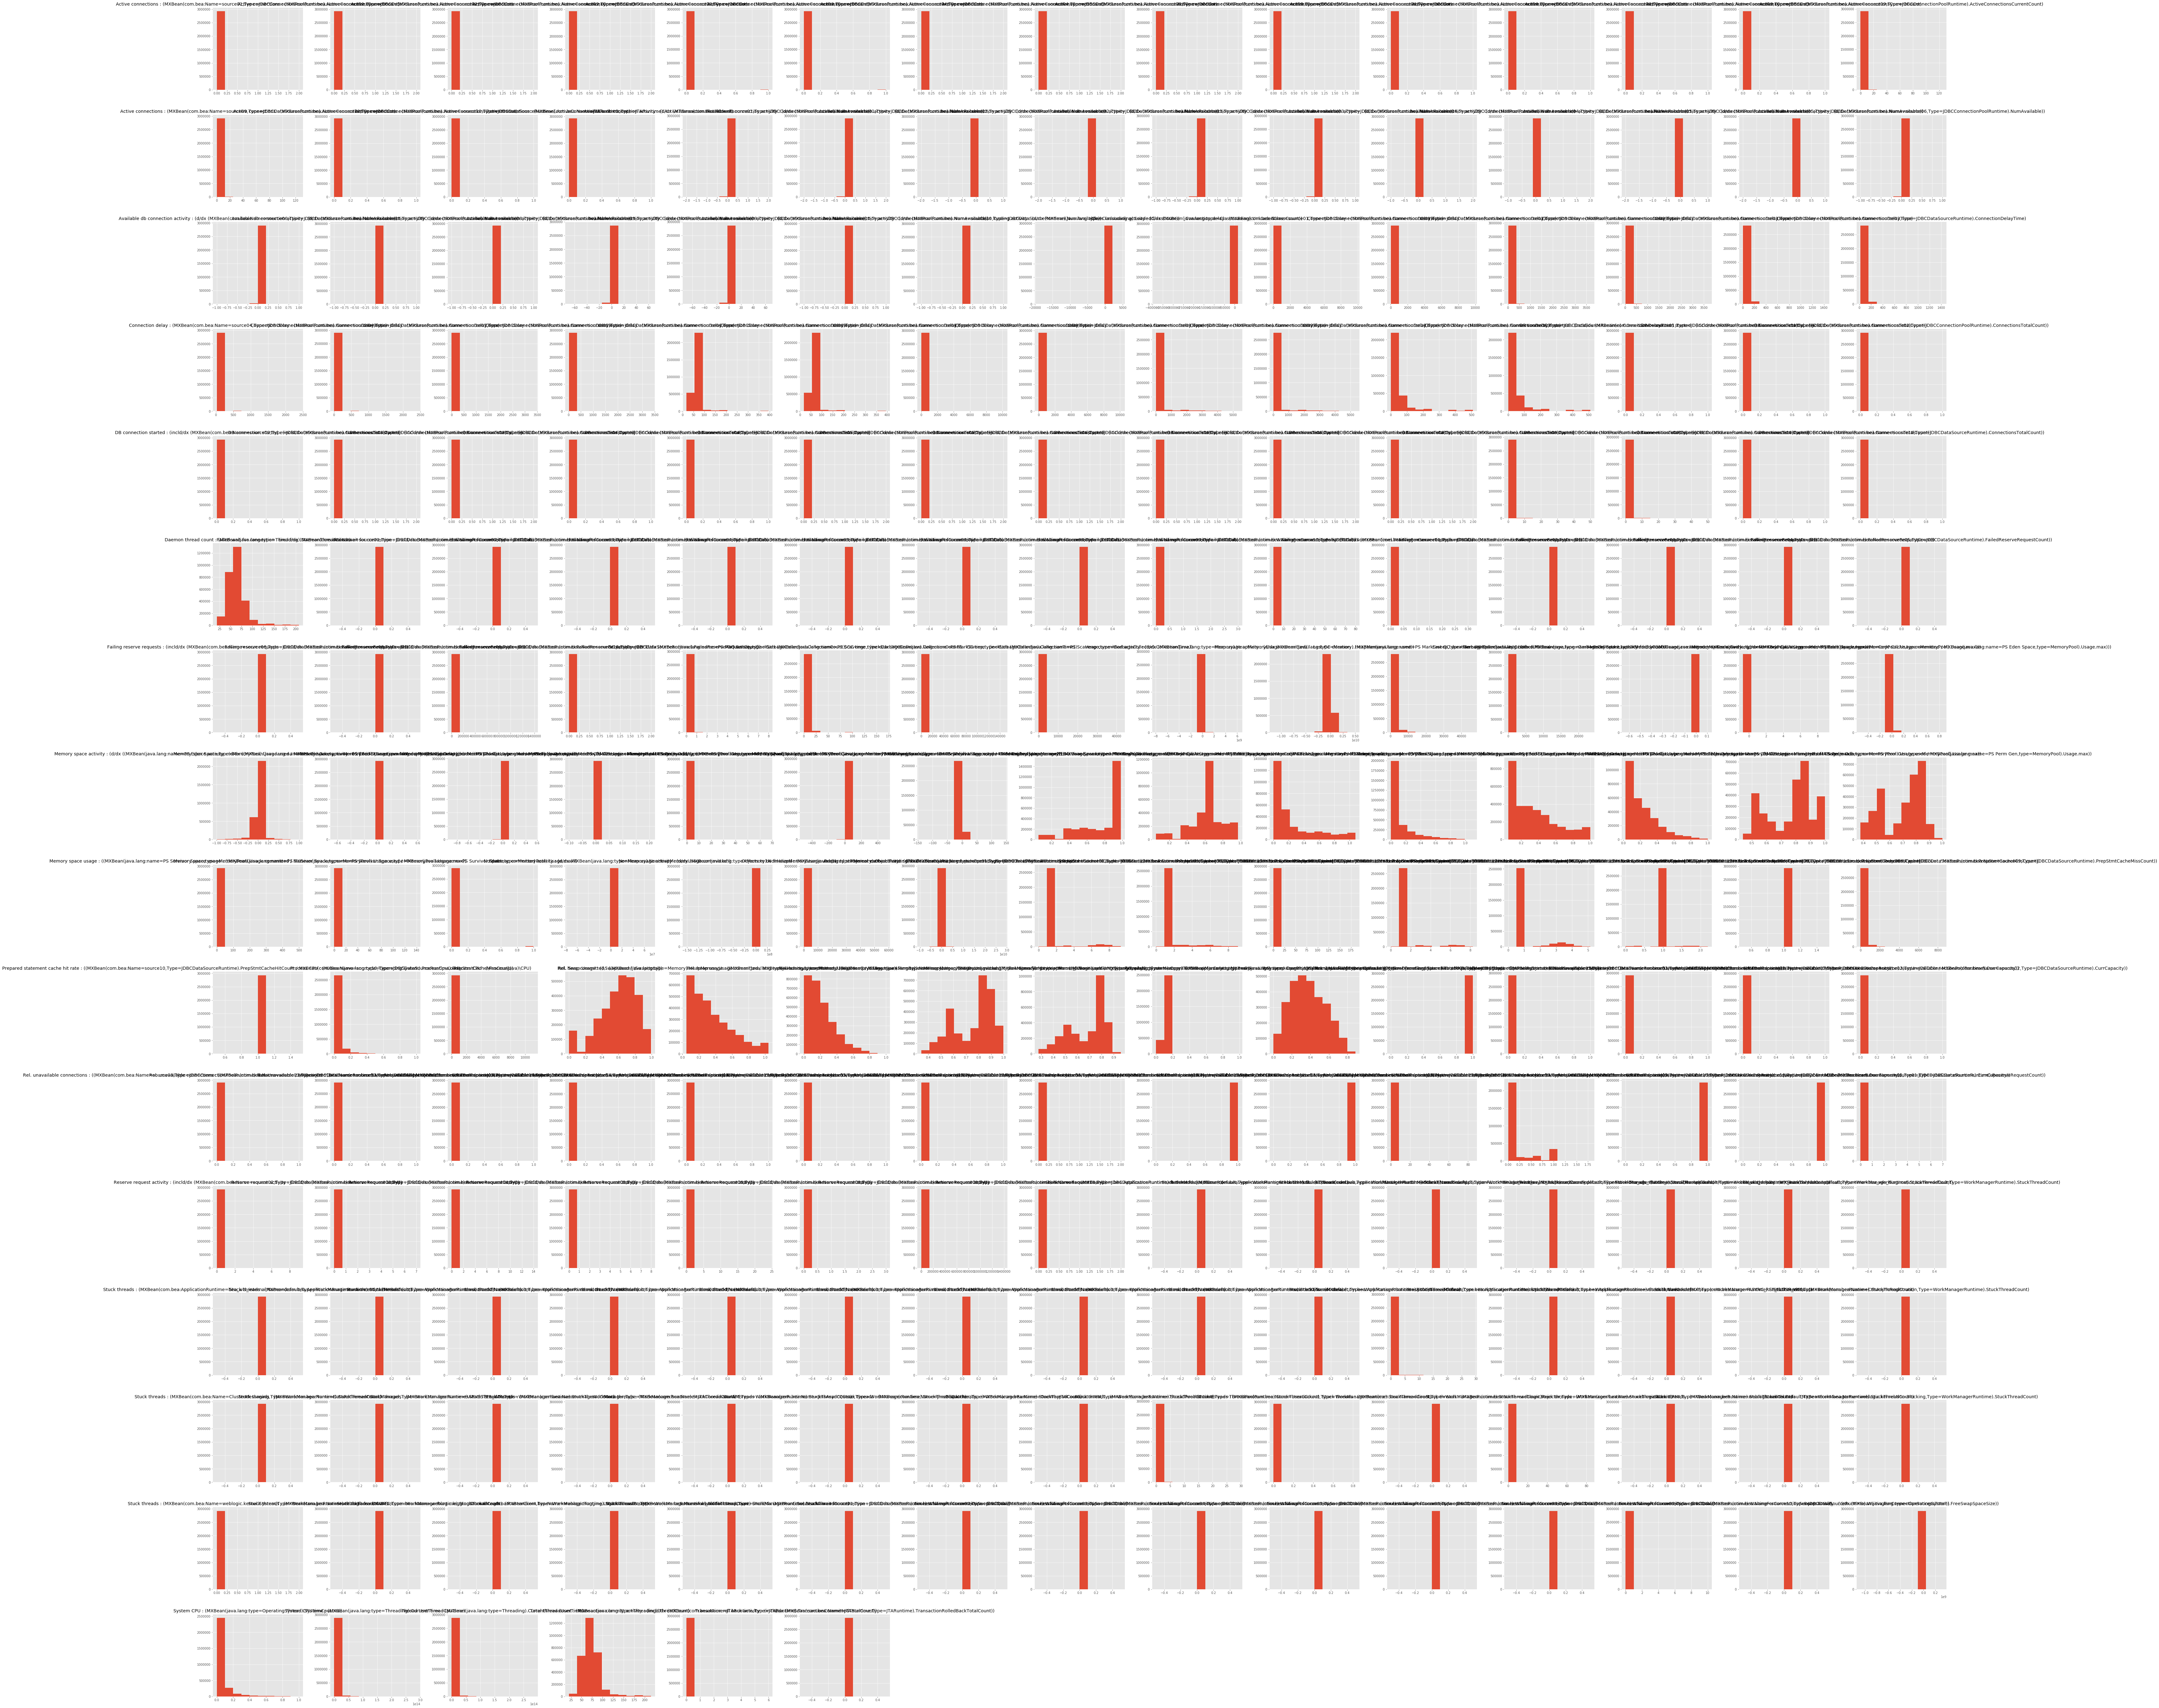

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.DataFrame.hist(sequences, figsize = [100,100]);

In [6]:
sequences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923898 entries, 0 to 2923897
Columns: 235 entries, host to Connection delay : (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ConnectionDelayTime)
dtypes: datetime64[ns](1), float64(231), object(3)
memory usage: 5.1+ GB


In [7]:
sequences.describe().loc[['min','max', 'mean']]

Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheMissCount))  \
min                                            0.000000                                                                                                                                                          
max                                            2.190476                                                                                                                                                          
mean                                           1.009877                                                                                                                                                          

      Memory space usage : ((MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.committed / MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.max))  \
min                                            0.053223                                                                                                          
max                                            0.981771                                                                                                          
mean                                           0.762020                                                                                                          

      Active connections : (MXBean(com.bea:Name=source04,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)  \
min                                            0.000000                                                                   
max                                            2.000000                                                                   
mean                                           0.000329                                                                   

      Available db connection activity : (d/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).NumAvailable))  \
min                                           -2.000000                                                                   
max                                            1.000000                                                                   
mean                                          -0.000001                                                                   

      Active connections : (MXBean(com.bea:Name=source03,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)  \
min                                            0.000000                                                                   
max                                            1.000000                                                                   
mean                                           0.002418                                                                   

      DB connection started : (incld/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ConnectionsTotalCount))  \
min                                            0.000000                                                                     
max                                            1.000000                                                                     
mean                                           0.000031                                                                     

      Heap usage activity : (d/dx (MXBean(java.lang:type=Memory).HeapMemoryUsage.used))  \
min                                       -1.157962e+10                                   
max                                        5.058930e+09                                   
mean                                       3.369199e+04                                   

      Connection delay : (MXBean(com.bea:Name=source10,Type=JDBCDataSourceRuntime).ConnectionDelayTime)  \
min                                            0.000000         

In [8]:
sequences.shape

(2923898, 235)

In [5]:
sequences = sequences.fillna(method = 'ffill') 
#new_sequences = sequences.dropna() 

In [6]:
sequences[sequences['isAnomaly']==True].head()

host process           timestamp  isAnomaly  \
603411  lphost08    wls1 2015-04-20 13:38:00       True   
603412  lphost08    wls1 2015-04-20 13:39:00       True   
603413  lphost08    wls1 2015-04-20 13:40:00       True   
603414  lphost08    wls1 2015-04-20 13:41:00       True   
603415  lphost08    wls1 2015-04-20 13:42:00       True   

        Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheMissCount))  \
603411                                                1.0                                                                                                                                                          
603412                                                1.0                                                                                                                                                          
603413                                                1.0                                                                                                                                                          
603414                                                1.0                                                                                                                                                          
603415                                                1.0                                                                                                                                                          

        Memory space usage : ((MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.committed / MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.max))  \
603411                                           0.971354                                                                                                          
603412                                           0.971354                                                                                                          
603413                                           0.971354                                                                                                          
603414                                           0.971354                                                                                                          
603415                                           0.971354                                                                                                          

        Active connections : (MXBean(com.bea:Name=source04,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)  \
603411                                                0.0                                                                   
603412                                                0.0                                                                   
603413                                                0.0                                                                   
603414                                                0.0                                                                   
603415                                                0.0                                                                   

        Available db connection activity : (d/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).NumAvailable))  \
603411                                                0.0                                                                   
603412                                                0.0                                                                   
603413                                                0.0                                                                   
603414                                                0.0                                                                   
603415                 

In [7]:
sequences[sequences['isAnomaly']==True].describe()

Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheMissCount))  \
count                                       79451.000000                                                                                                                                                          
mean                                            1.004186                                                                                                                                                          
std                                             0.060402                                                                                                                                                          
min                                             1.000000                                                                                                                                                          
25%                                             1.000000                                                                                                                                                          
50%                                             1.000000                                                                                                                                                          
75%                                             1.000000                                                                                                                                                          
max                                             2.190476                                                                                                                                                          

       Memory space usage : ((MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.committed / MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.max))  \
count                                       79451.000000                                                                                                          
mean                                            0.931148                                                                                                          
std                                             0.174522                                                                                                          
min                                             0.190186                                                                                                          
25%                                             0.970052                                                                                                          
50%                                             0.971354                                                                                                          
75%                                             0.980469                                                                                                          
max                                             0.980469                                                                                                          

       Active connections : (MXBean(com.bea:Name=source04,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)  \
count                                            79451.0                                                                   
mean                                                 0.0                                                                   
std                                                  0.0                                                                   
min                                                  0.0                                                                   
25%                

In [14]:
labels = sequences['isAnomaly']
sequences = sequences.drop(columns=['isAnomaly', 'host', 'process', 'timestamp'])

In [11]:
sequences.shape

(2923898, 231)

In [12]:
sequences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923898 entries, 0 to 2923897
Columns: 231 entries, Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheMissCount)) to Connection delay : (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ConnectionDelayTime)
dtypes: float64(231)
memory usage: 5.0 GB


In [14]:
sequences.dtypes

Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheMissCount))    float64
Memory space usage : ((MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.committed / MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.max))                                                    float64
Active connections : (MXBean(com.bea:Name=source04,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)                                                                                           float64
Available db connection activity : (d/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).NumAvailable))                                                                                           float64
Active connections : (MXBean(com.bea:Name=source03,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)                                       

In [18]:
forest = RandomForestClassifier(n_estimators=60, n_jobs=-1, random_state=42)
forest_labels = cross_val_predict(forest, sequences, labels, cv=4,
                                  method='predict_proba')[:, 1]

In [15]:
X = sequences
y = labels

In [16]:
#X.value_counts()
y.value_counts()

False    2844447
True       79451
Name: isAnomaly, dtype: int64

In [17]:
# Split red wine datasets into train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
#print(confusion_matrix(labels, forest_labels))

In [18]:
rfc_balanced = RandomForestClassifier(n_estimators=60, class_weight='balanced')
rfc_balanced.fit(X_train, y_train)
#proba_rfc_balanced = rfc_balanced.predict_proba(X_test)
#pred_rfc_balanced = rfc_balanced.predict(X_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
proba_rfc_balanced = rfc_balanced.predict_proba(X_test)

In [20]:
pred_rfc_balanced = rfc_balanced.predict(X_test)

In [23]:
#Confusion matrix and Accuracy score
print(confusion_matrix(y_test, pred_rfc_balanced))
print(accuracy_score(y_test, pred_rfc_balanced))
print(classification_report(y_test, pred_rfc_balanced))
#print(roc_auc_score(y_test, proba_rfc_balanced, multi_class="ovo", average="macro")) 
print(balanced_accuracy_score(y_test, pred_rfc_balanced))

[[569147      7]
 [     2  15624]]
0.9999846095967715
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    569154
        True       1.00      1.00      1.00     15626

    accuracy                           1.00    584780
   macro avg       1.00      1.00      1.00    584780
weighted avg       1.00      1.00      1.00    584780

0.9999298546177406


In [20]:
# precision recall
print("precision_score: ",precision_score(labels, forest_labels > 0.02), "\nrecall_score: ",recall_score(labels, forest_labels > 0.02))
# roc_auc_score
print("roc_auc_score: ",roc_auc_score(labels, forest_labels))
# roc_curve
fpr, tpr, _ = roc_curve(labels, forest_labels)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [ ]:
# prc_curve
pr, rc, _ = precision_recall_curve(labels, forest_labels)
plt.plot(rc, pr)
plt.xlabel('rc')
plt.ylabel('pr')
print("prc_auc_score: ",auc(rc, pr))

In [ ]:
f2_score = fbeta_score(labels.astype(int), forest_labels.astype(int), beta=2)

In [ ]:
# RandomForestNotifyer
message='RandomForest done \n  window_size '+str(window_size)+ ' \n  window_method '+ str(window_method)+'\n  auc_roc '+str(roc_auc_score(labels, forest_labels)) +'\n  auc_rpc '+str(auc(rc, pr))+'\n  f2_score '+str(f2_score)+'\n'+experiment_message

In [15]:
window_size = 4

window_method = 1

In [ ]:
window_sequences = pd.DataFrame()
window_labels = pd.DataFrame()
for i in range(window_size):
    window_sequences = pd.concat([window_sequences, sequences.shift(periods=i)], axis=1)
    window_labels[f'shifted_{i}'] = labels.shift(periods=i)

sequences = window_sequences
labels = window_labels

sequences.dropna(inplace=True)
labels.dropna(inplace=True)

num_columns = labels.shape[1]
sum_lables = labels.sum(axis=1)
if(window_method==0):
    for val_index in sum_lables.index:
        if sum_lables[val_index] != 0:
            sum_lables[val_index] = 1
elif(window_method==1):
    for val_index in sum_lables.index:
        if sum_lables[val_index] == num_columns:
            sum_lables[val_index] = 1
        else:
            sum_lables[val_index] = 0
            
labels=sum_lables

In [10]:
sequences.isAnomaly.value_counts()

False    2844447
True       79451
Name: isAnomaly, dtype: int64

In [11]:
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected = True)

def line_plot_check_nan(df1, df2, x, y, title, width, height):
    
    trace1 = go.Scatter(
        x = df1[x],
        y = df1[y],
        mode='lines',
        name='with_nans',
        marker = dict(
            color = '#1E90FF', 
        ), 
    )
    
    df3 = df2.dropna()
    trace2 = go.Scatter(
        x = df3[x],
        y = df3[y],
        mode='markers',
        name='no_nans',
        marker = dict(
            color = 'red', 
        ), 
    )
    
    layout = go.Layout(
        title = go.layout.Title(
            text = title,
            x = 0.5
        ),
        font = dict(size = 14),
        width = width,
        height = height,
    )
    
    data = [trace1, trace2]
    fig = go.Figure(data = data, layout = layout)
    py.iplot(fig, filename = 'line_plot')

In [15]:
line_plot_check_nan(df[df['isAnomaly']==True], df[df['isAnomaly']==True], 'timestamp', "Heap usage activity : (d/dx (MXBean(java.lang:type=Memory).HeapMemoryUsage.used))"," Memory space usage by date", 1400, 600)

NameError: name 'go' is not defined

In [13]:
line_plot_check_nan(df[df['isAnomaly']==False], df[df['isAnomaly']==False], 'timestamp', "Heap usage activity : (d/dx (MXBean(java.lang:type=Memory).HeapMemoryUsage.used))"," Memory space usage by date", 1400, 600)

The correlation between Heap usage activity : (d/dx (MXBean(java.lang:type=Memory).HeapMemoryUsage.used)) and the TARGET is 0.0013
Median value for request with high runtime value = 58136488.0000
Median value for request with low runtime value =     14758192.0000


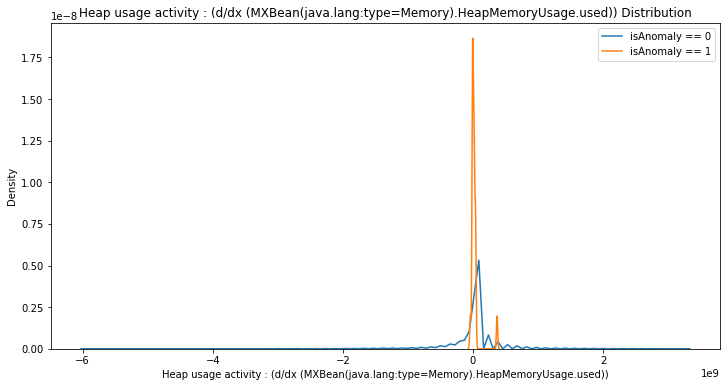

In [14]:
# Plots the disribution of a variable colored by value of the target
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['isAnomaly'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_highr = df.loc[df['isAnomaly'] == 0, var_name].median()
    avg_lowr = df.loc[df['isAnomaly'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.loc[df['isAnomaly'] == 0, var_name], label = 'isAnomaly == 0')
    sns.kdeplot(df.loc[df['isAnomaly'] == 1, var_name], label = 'isAnomaly == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for request with high runtime value = %0.4f' % avg_highr)
    print('Median value for request with low runtime value =     %0.4f' % avg_lowr)
    

kde_target('Heap usage activity : (d/dx (MXBean(java.lang:type=Memory).HeapMemoryUsage.used))', df[['Heap usage activity : (d/dx (MXBean(java.lang:type=Memory).HeapMemoryUsage.used))','isAnomaly']].dropna(),)

## End Notebook